# IST 503 PROJECT - Video on Demand Quick Test Analysis

In [17]:
import pandas as pd
import numpy as np
from cytoolz import *
from tqdm.auto import tqdm

tqdm.pandas()

### Load Paramount and HBO Text Documents

In [18]:
pd.options.display.max_colwidth = 150 ###
df = pd.read_table('Document_Data.txt', delimiter=';')

In [19]:
df.head()

,Name,Document,Text
0,HBO Max,About Us,"HBO Max is a direct-to-consumer streaming platform from Warner Bros. Discovery, offering best in class quality entertainment. HBO Max delivers the..."
1,HBO Max,Advocacy and Inclusion,"COMMUNITY WE SHAPE OUR COMMUNITIES Equity, diversity, inclusion, and corporate social responsibility are moral and business imperatives. A strong ..."
2,HBO Max,Technology and Innovation,"WarnerMedia is not only a first-in-class media company, but a robust technology organization that brings content to life in exciting new ways. We ..."
3,HBO Max,Equity and Inclusion Report 2020-21,THE POWER OF STORIES Equity & Inclusion Report 2020/21 2020 didnt change our equity and inclusion strategy. It proved we had more to do... WarnerM...
4,HBO Max,Press Release,"Wednesday, April 06, 2022 A Tiny Audience Season Three To Debut Friday, April 22 On HBO Max . The hit music series A TINY AUDIENCE returns for a t..."


Now that the documents have been loaded lets check the data types and do some quick counts.

### Data Preparation & Data Exploration

In [20]:
df.dtypes

Name        object
Document    object
Text        object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      126 non-null    object
 1   Document  126 non-null    object
 2   Text      126 non-null    object
dtypes: object(3)
memory usage: 3.1+ KB


#### Summary for Categorical Fields

In order to do this, specifying "include='O'" which is the alias for "np.object."

In [22]:
df[['Name', 'Document', 'Text']].describe(include='O').T

,count,unique,top,freq
Name,126,2,Paramount,65
Document,126,12,Press Release,38
Text,126,126,"HBO Max is a direct-to-consumer streaming platform from Warner Bros. Discovery, offering best in class quality entertainment. HBO Max delivers the...",1


In [23]:
df['Name'].value_counts()

Paramount    65
HBO Max      61
Name: Name, dtype: int64

In [24]:
df['Document'].value_counts()

Press Release                          38
LinkedIn Post                          35
Job Posting                            24
News Release                           12
Earnings Transcript                     6
Event Transcript                        5
About Us                                1
Advocacy and Inclusion                  1
Technology and Innovation               1
Equity and Inclusion Report 2020-21     1
Letter to Stockholders                  1
2022 Proxy Statement                    1
Name: Document, dtype: int64

In [25]:
df.groupby(['Name','Document'])['Name'].count()

Name       Document                           
HBO Max    About Us                                1
           Advocacy and Inclusion                  1
           Equity and Inclusion Report 2020-21     1
           Job Posting                            12
           LinkedIn Post                          15
           Press Release                          30
           Technology and Innovation               1
Paramount  2022 Proxy Statement                    1
           Earnings Transcript                     6
           Event Transcript                        5
           Job Posting                            12
           Letter to Stockholders                  1
           LinkedIn Post                          20
           News Release                           12
           Press Release                           8
Name: Name, dtype: int64

### Keyness Analysis & Word Clouds

In [26]:
import re
from collections import Counter

### Let's normalize, tokenize, count tokens, and convert punctuation until a blank space.

In [27]:
def tokenize(text):
    return re.sub(r'[^a-z]+', ' ', text.lower()).split()

def termf(texts):  #count and termf is the same thing
    return Counter(concat(map(tokenize, tqdm(texts))))

In [28]:
def count (texts):
   return Counter(concat(map(tokenize, tqdm(texts))))

In [29]:
count(df['Text'][:10])

  0%|          | 0/10 [00:00<?, ?it/s]

Counter({'hbo': 122,
         'max': 80,
         'is': 221,
         'a': 501,
         'direct': 6,
         'to': 688,
         'consumer': 4,
         'streaming': 8,
         'platform': 11,
         'from': 98,
         'warner': 59,
         'bros': 59,
         'discovery': 2,
         'offering': 2,
         'best': 21,
         'in': 379,
         'class': 5,
         'quality': 2,
         'entertainment': 14,
         'delivers': 1,
         'the': 1157,
         'greatest': 4,
         'array': 4,
         'of': 661,
         'series': 50,
         'movies': 6,
         'and': 903,
         'specials': 2,
         'for': 207,
         'audiences': 33,
         'all': 95,
         'ages': 1,
         'iconic': 7,
         'brands': 15,
         'dc': 50,
         'as': 132,
         'well': 25,
         'originals': 2,
         'blockbuster': 3,
         'films': 25,
         'beloved': 5,
         'kids': 18,
         'family': 24,
         'content': 157,
         'launch

In [30]:
f = pd.DataFrame()
f['all'] = pd.Series(termf(df['Text']))

  0%|          | 0/126 [00:00<?, ?it/s]

In [31]:
f.head(10)

,all
hbo,472
max,265
is,2261
a,4538
direct,65
to,6330
consumer,119
streaming,1074
platform,126
from,1016


In [32]:
f['all'].sort_values(ascending=False)

the                     11579
and                      9422
of                       7441
to                       6330
in                       4614
                        ...  
memberships                 1
toll                        1
contents                    1
livewebcast                 1
transdayofvisibility        1
Name: all, Length: 12224, dtype: int64

In [33]:
f['HBO Max'] = pd.Series(termf(df[df['Name']=='HBO Max']['Text'])).fillna(0)

  0%|          | 0/61 [00:00<?, ?it/s]

In [34]:
f.head()

,all,HBO Max
hbo,472,466.0
max,265,259.0
is,2261,355.0
a,4538,763.0
direct,65,8.0


In [35]:
f['Paramount'] = pd.Series(termf(df[df['Name']=='Paramount']['Text'])).fillna(0)

  0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
f.head()

,all,HBO Max,Paramount
hbo,472,466.0,6.0
max,265,259.0,6.0
is,2261,355.0,1906.0
a,4538,763.0,3775.0
direct,65,8.0,57.0


Token counts by Name (company) has been completed.  Let's setup keyness metrics.

### Keyness Metrics

In [37]:
import llr
from math import log2

In [38]:
N_all = f['all'].sum()
N_HBO_Max = f['HBO Max'].sum()
N_Paramount = f['Paramount'].sum()

In [39]:
N_all, N_HBO_Max

(247993, 43408.0)

In [40]:
N_all, N_Paramount

(247993, 204585.0)

#### Let's calculate and apply keyness metrics

In [41]:
def G2(f12, f1, f2, N):
    return llr.llr_root(f12, f1-f12, f2-f12, N-f1-f2+f12)

def pmi(f12, f1, f2, N):
    return log2(f12) + log2(N) - log2(f1) - log2(f2)

In [42]:
f['HBO_Max_G2'] = f.progress_apply(lambda r: G2(r['HBO Max'], r['all'], N_HBO_Max, N_all), axis=1)
f['HBO_Max_pmi'] = f.progress_apply(lambda r: pmi(r['HBO Max'], r['all'], N_HBO_Max, N_all), axis=1)

  0%|          | 0/12224 [00:00<?, ?it/s]

  0%|          | 0/12224 [00:00<?, ?it/s]

In [43]:
f['Paramount_G2'] = f.progress_apply(lambda r: G2(r['Paramount'], r['all'], N_Paramount, N_all), axis=1)
f['Paramount_pmi'] = f.progress_apply(lambda r: pmi(r['Paramount'], r['all'], N_Paramount, N_all), axis=1)

  0%|          | 0/12224 [00:00<?, ?it/s]

  0%|          | 0/12224 [00:00<?, ?it/s]

### Generate Word Clouds on Subjects

First, we will find a good lower broundary for All values, so we can cut out overexaggerated PMI and G2 amounts.

In [67]:
f.sort_values(ascending=False, by='HBO_Max_G2').head(30)

,all,HBO Max,Paramount,HBO_Max_G2,HBO_Max_pmi,Paramount_G2,Paramount_pmi
hbo,472,466.0,6.0,39.577446,2.495810,-39.577446,-6.020082
max,265,259.0,6.0,29.137666,2.481226,-29.137666,-5.187287
warnermedia,230,229.0,1.0,28.048039,2.507980,-28.048039,-7.567891
communities,143,134.0,9.0,20.091089,2.420484,-20.091089,-3.712347
workforce,125,119.0,6.0,19.214653,2.443300,-19.214653,-4.103223
inclusion,189,148.0,41.0,18.284170,2.161477,-18.284170,-1.927091
courtesy,91,91.0,NaN,17.814018,2.514267,NaN,NaN
pg,84,84.0,NaN,17.114828,2.514267,NaN,NaN
warner,91,86.0,5.0,16.219779,2.432737,-16.219779,-3.908268
bros,88,84.0,4.0,16.183642,2.447152,-16.183642,-4.181833


In [68]:
f[f['all']>25].sort_values(ascending=False, by='HBO_Max_G2').head(10)

,all,HBO Max,Paramount,HBO_Max_G2,HBO_Max_pmi,Paramount_G2,Paramount_pmi
hbo,472,466.0,6.0,39.577446,2.495810,-39.577446,-6.020082
max,265,259.0,6.0,29.137666,2.481226,-29.137666,-5.187287
warnermedia,230,229.0,1.0,28.048039,2.507980,-28.048039,-7.567891
communities,143,134.0,9.0,20.091089,2.420484,-20.091089,-3.712347
workforce,125,119.0,6.0,19.214653,2.443300,-19.214653,-4.103223
inclusion,189,148.0,41.0,18.284170,2.161477,-18.284170,-1.927091
courtesy,91,91.0,NaN,17.814018,2.514267,NaN,NaN
pg,84,84.0,NaN,17.114828,2.514267,NaN,NaN
warner,91,86.0,5.0,16.219779,2.432737,-16.219779,-3.908268
bros,88,84.0,4.0,16.183642,2.447152,-16.183642,-4.181833


In [46]:
f.sort_values(ascending=False, by='HBO_Max_pmi').head(10)

,all,HBO Max,Paramount,HBO_Max_G2,HBO_Max_pmi,Paramount_G2,Paramount_pmi
shapewhatsnext,1,1.0,NaN,1.866958,2.514267,NaN,NaN
lenny,1,1.0,NaN,1.866958,2.514267,NaN,NaN
marieke,2,2.0,NaN,2.640285,2.514267,NaN,NaN
nijkamp,3,3.0,NaN,3.233684,2.514267,NaN,NaN
colorao,1,1.0,NaN,1.866958,2.514267,NaN,NaN
gordon,3,3.0,NaN,3.233684,2.514267,NaN,NaN
tente,1,1.0,NaN,1.866958,2.514267,NaN,NaN
permanently,1,1.0,NaN,1.866958,2.514267,NaN,NaN
wheelchair,1,1.0,NaN,1.866958,2.514267,NaN,NaN
herself,3,3.0,NaN,3.233684,2.514267,NaN,NaN


In [69]:
f[f['all']>25].sort_values(ascending=False, by='HBO_Max_pmi').head(10)

,all,HBO Max,Paramount,HBO_Max_G2,HBO_Max_pmi,Paramount_G2,Paramount_pmi
sesame,29,29.0,NaN,10.054645,2.514267,NaN,NaN
courtesy,91,91.0,NaN,17.814018,2.514267,NaN,NaN
cartoon,47,47.0,NaN,12.800826,2.514267,NaN,NaN
pg,84,84.0,NaN,17.114828,2.514267,NaN,NaN
dc,66,66.0,NaN,15.169928,2.514267,NaN,NaN
warnermedia,230,229.0,1.0,28.048039,2.507980,-28.048039,-7.567891
hbo,472,466.0,6.0,39.577446,2.495810,-39.577446,-6.020082
max,265,259.0,6.0,29.137666,2.481226,-29.137666,-5.187287
cnn,36,35.0,1.0,10.642453,2.473625,-10.642453,-4.892326
bros,88,84.0,4.0,16.183642,2.447152,-16.183642,-4.181833


In [79]:
f.sort_values(ascending=False, by='Paramount_G2').head(50)

,all,HBO Max,Paramount,HBO_Max_G2,HBO_Max_pmi,Paramount_G2,Paramount_pmi
refinitiv,1038,NaN,1038.0,NaN,NaN,20.009556,0.277599
paramountplus,872,NaN,872.0,NaN,NaN,18.336507,0.277599
viacomcbs,811,NaN,811.0,NaN,NaN,17.682320,0.277599
streaming,1074,23.0,1051.0,-16.219685,-3.030950,16.219685,0.246368
inc,616,5.0,611.0,-13.955627,-4.430592,13.955627,0.265841
paramount,500,1.0,499.0,-13.464761,-6.451518,13.464761,0.274711
q,461,2.0,459.0,-12.571025,-5.334356,12.571025,0.271326
compensation,406,NaN,406.0,NaN,NaN,12.505350,0.277599
that,2891,273.0,2618.0,-12.357455,-0.890329,12.357455,0.134496
you,1509,113.0,1396.0,-11.343001,-1.224932,11.343001,0.165305


In [85]:
f[f['all']>120].sort_values(ascending=False, by='Paramount_G2').head(50)

,all,HBO Max,Paramount,HBO_Max_G2,HBO_Max_pmi,Paramount_G2,Paramount_pmi
refinitiv,1038,NaN,1038.0,NaN,NaN,20.009556,0.277599
paramountplus,872,NaN,872.0,NaN,NaN,18.336507,0.277599
viacomcbs,811,NaN,811.0,NaN,NaN,17.682320,0.277599
streaming,1074,23.0,1051.0,-16.219685,-3.030950,16.219685,0.246368
inc,616,5.0,611.0,-13.955627,-4.430592,13.955627,0.265841
paramount,500,1.0,499.0,-13.464761,-6.451518,13.464761,0.274711
q,461,2.0,459.0,-12.571025,-5.334356,12.571025,0.271326
compensation,406,NaN,406.0,NaN,NaN,12.505350,0.277599
that,2891,273.0,2618.0,-12.357455,-0.890329,12.357455,0.134496
you,1509,113.0,1396.0,-11.343001,-1.224932,11.343001,0.165305


In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [49]:
def cloud(freqs, k=200):
    plt.figure(figsize=(10,10))
    items = dict(freqs.sort_values(ascending=False).head(k))
    wc = WordCloud(width=1000,
                  height=700,
                  background_color='white').generate_from_frequencies(items)
    plt.axis('off')
    plt.imshow(wc, interpolation='bilinear')
    plt.show()

#### WM / HBO Max

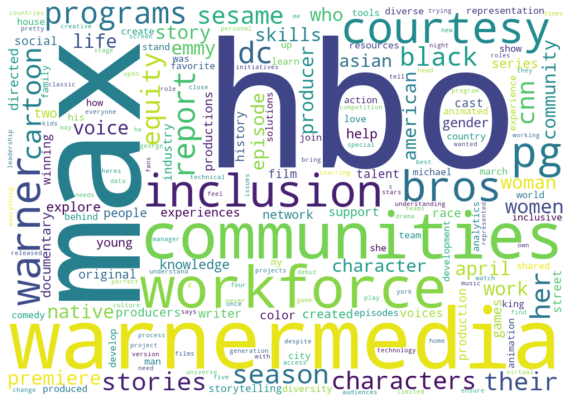

In [70]:
cloud(f['HBO_Max_G2'][f['all']>25])

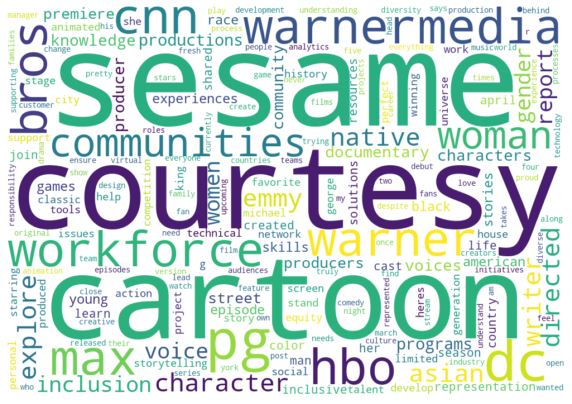

In [71]:
cloud(f['HBO_Max_pmi'][f['all']>25])

#### Paramount / Paramount+

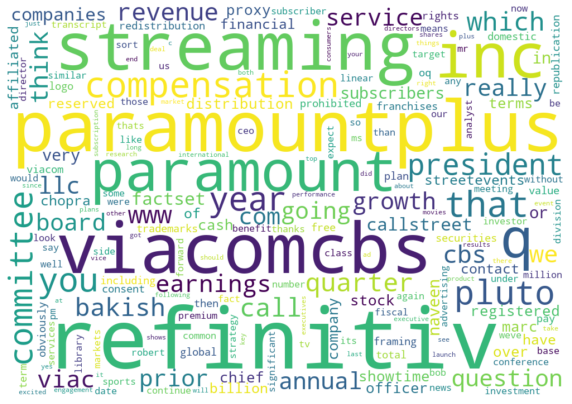

In [86]:
cloud(f['Paramount_G2'][f['all']>100])

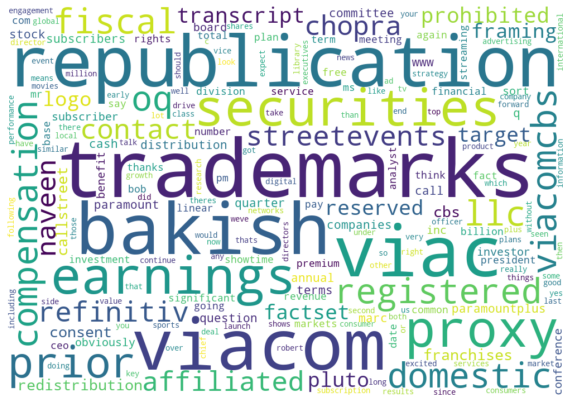

In [87]:
cloud(f['Paramount_pmi'][f['all']>100])